<a href="https://colab.research.google.com/github/ampereapescador/MetodosI_AnaPerea_JuanGomez/blob/main/Parcial2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:

import numpy as np
from numpy.polynomial.legendre import leggauss as roots_legendre
import matplotlib.pyplot as plt

In [ ]:
# Tierra plana, la tierra es un disco, introducir integral eliptica Cuadratura de Legendre

In [11]:
#24

N = 50
k_original = 1.9429303960
R = 1.0
z = 0.2
g_esperado = -9.813646

# Función que representa la ecuación (4.208)
def integral(r, phi, x=0, y=0, z=z):
    denominador = (x*2 + y2 + z2 - 2*r*x*np.cos(phi) - 2*r*y*np.sin(phi))*(3/2)
    return r * z / denominador

# Función de doble cuadratura
def doble_cuadratura(n, k):
    puntos_r, pesos_r = roots_legendre(n)
    puntos_phi, pesos_phi = roots_legendre(n)

    puntos_r = 0.5 * (puntos_r + 1) * R
    pesos_r = 0.5 * pesos_r * R

    suma = 0.0

    for i in range(n):
        for j in range(n):
            r = puntos_r[i]
            phi = puntos_phi[j]
            peso = pesos_r[i] * pesos_phi[j]
            suma += peso * integral(r, phi)

    return -k * suma

# Calcular el campo gravitacional con la constante original
g_calculado_original = doble_cuadratura(N, k_original)
print(f"Campo gravitacional calculado con k original: {g_calculado_original} m/s²")

# Ajustar k para que g_calculado sea igual a g_esperado
# k_nuevo = k_original * (-g_esperado / g_calculado_original)
k_nuevo = k_original * (g_esperado / g_calculado_original)

# Calcular el campo gravitacional con la nueva constante
g_calculado_nuevo = doble_cuadratura(N, k_nuevo)
print(f"Campo gravitacional calculado con k ajustada: {g_calculado_nuevo} m/s²")

# Verificación
if np.isclose(g_calculado_nuevo, g_esperado, atol=1e-6):
    print(f"El valor calculado con k ajustada es correcto: {g_calculado_nuevo} m/s²")
else:
    print(f"El valor calculado no es correcto. Debería ser: {g_esperado} m/s²")


k_nuevo = k_original * (g_esperado / g_calculado_original)  # Ajustar según el cálculo anterior si es necesario
R_vals = [0, 0.125, 0.25, 0.38, 0.5]  # Valores de radio
phi_vals = np.linspace(0, 2 * np.pi, 10)  # 10 valores de phi
z = 0.2  # Mantener constante en 0.2


# Función que representa la ecuación (4.208) en coordenadas polares corregida
def integral_polar(r, phi, x=0, y=0, z=z):
    denominador = (x*2 + y2 + z2 - 2*r*x*np.cos(phi) - 2*r*y*np.sin(phi))*(3/2)
    return r * z / denominador

# Calcular el campo gravitacional para un conjunto de r y phi
def calcular_campo(r_vals, phi_vals, k, escala=1):
    campos = []
    for r in r_vals:
        g_phi = []
        for phi in phi_vals:
            g = -k * integral_polar(r, phi)
            g_phi.append(g)
        campos.append(g_phi)
    return campos

# Calcular campos gravitacionales
campos = calcular_campo(R_vals, phi_vals, k_nuevo)

# Graficar el campo gravitacional para cada valor de R
fig, ax = plt.subplots()

for i, r in enumerate(R_vals):
    ax.plot(phi_vals, campos[i], label=f'r = {r}')

# Configurar gráfico
ax.set_xlabel(r'$\phi$ (radianes)')
ax.set_ylabel(f'$g_k(x, y, 0.2) $ (m/s²)')
ax.set_title('Comportamiento Azimutal del Campo Gravitacional (Escalado)')
ax.legend()
plt.grid(True)
plt.show()

NameError: name 'roots_legendre' is not defined

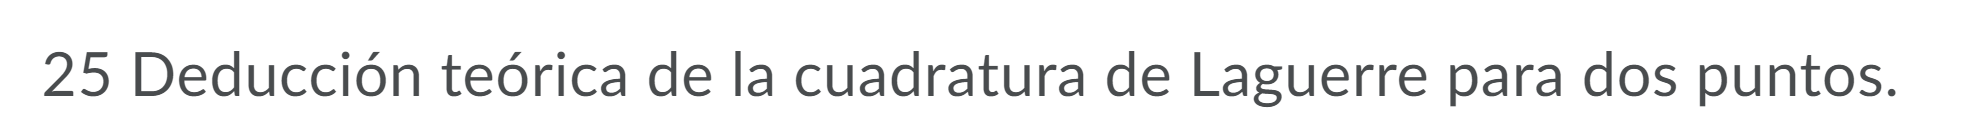

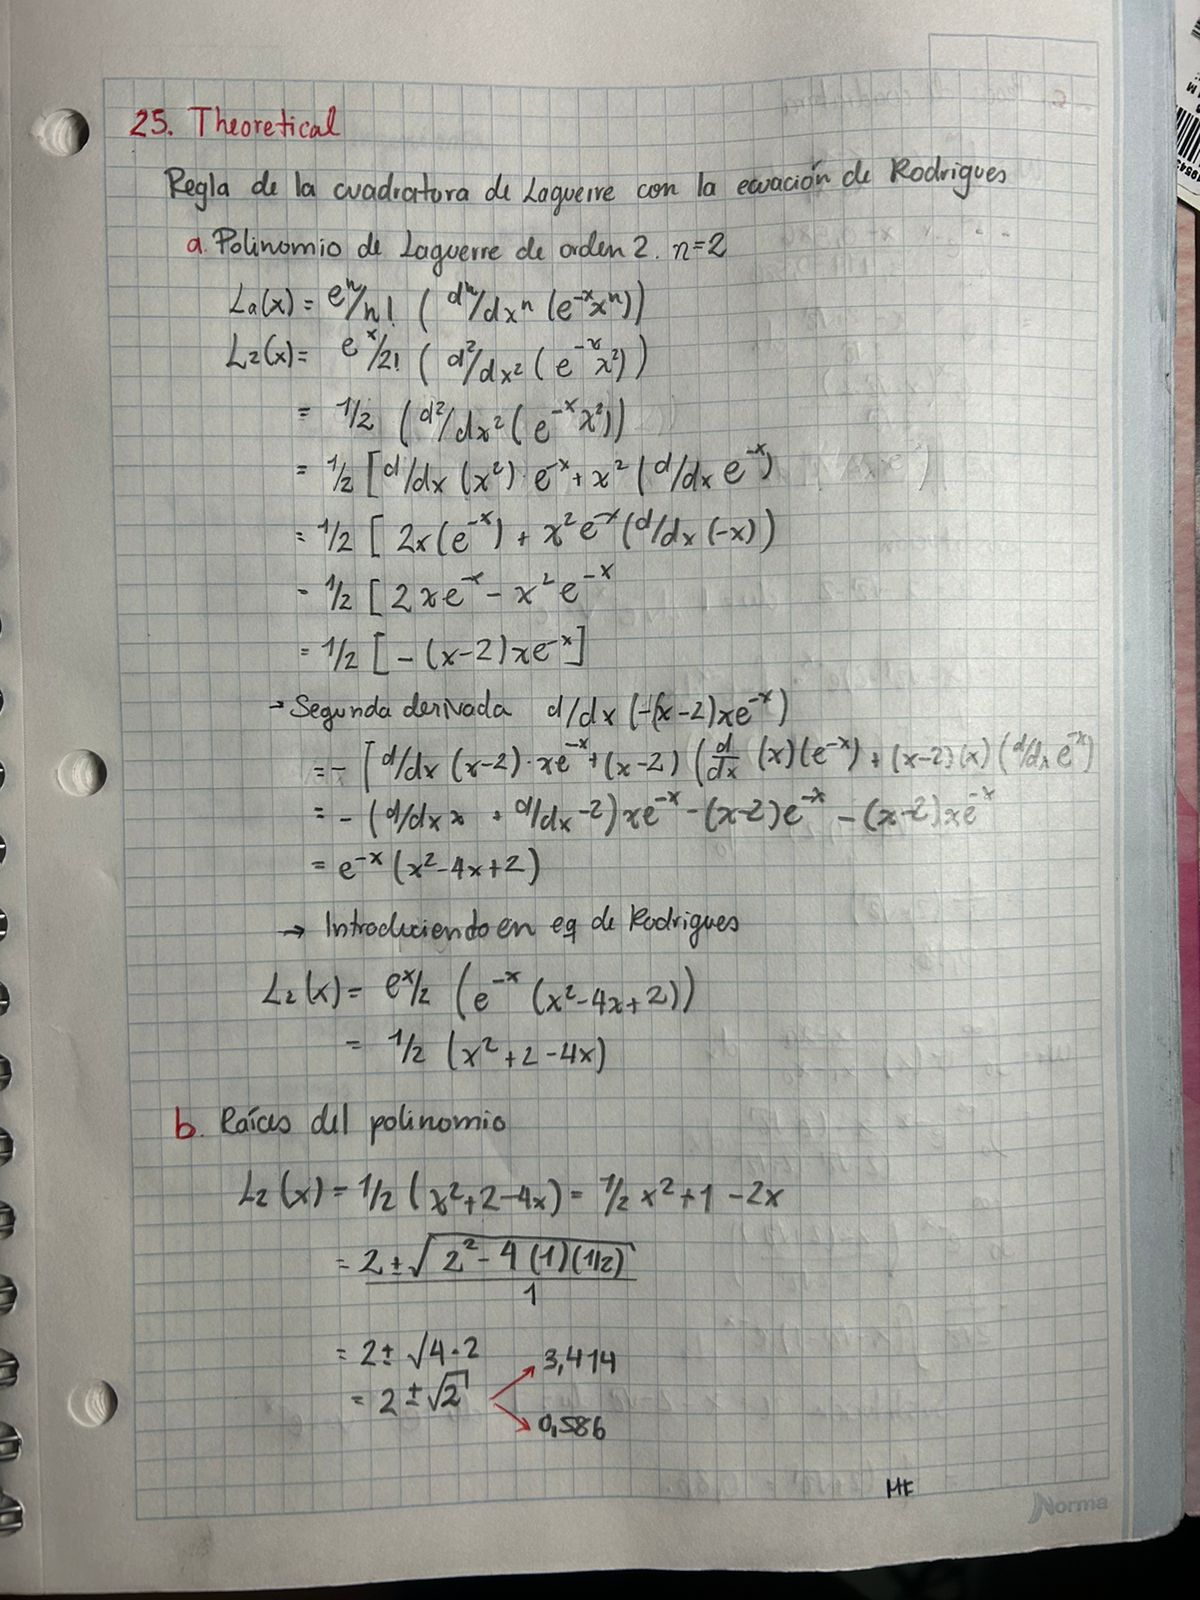

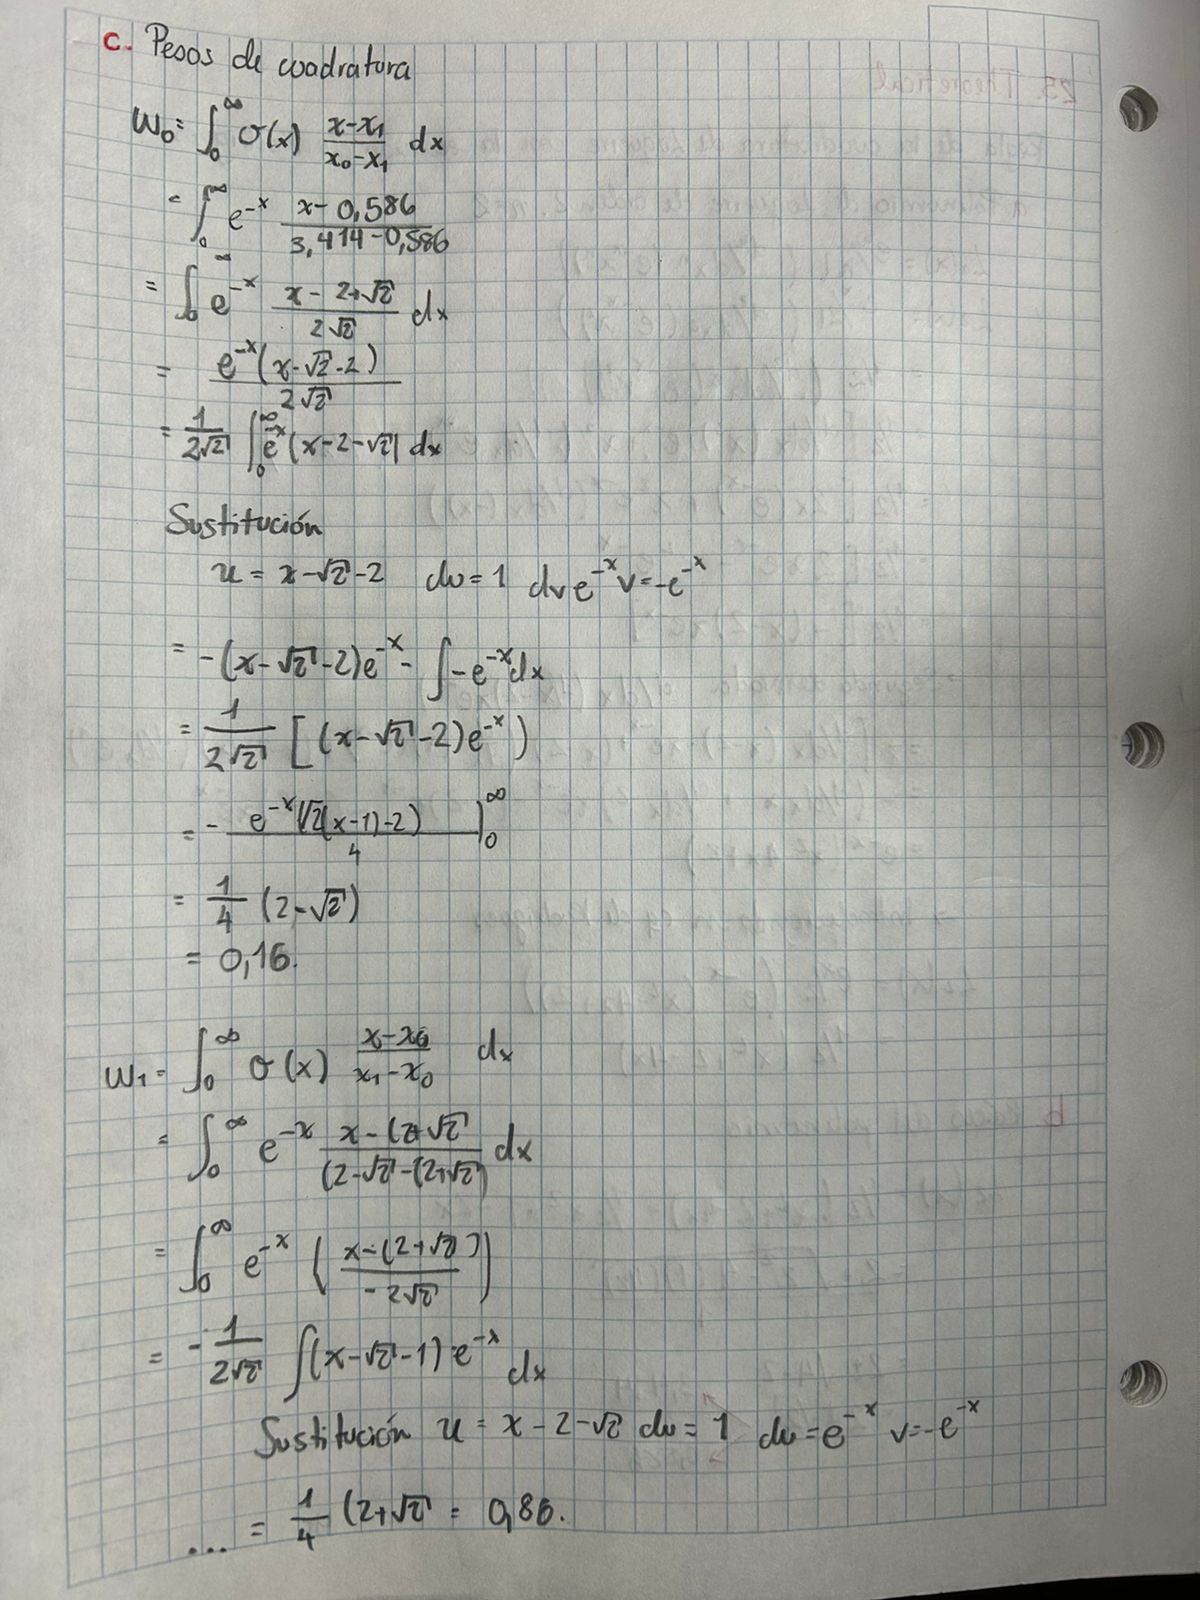

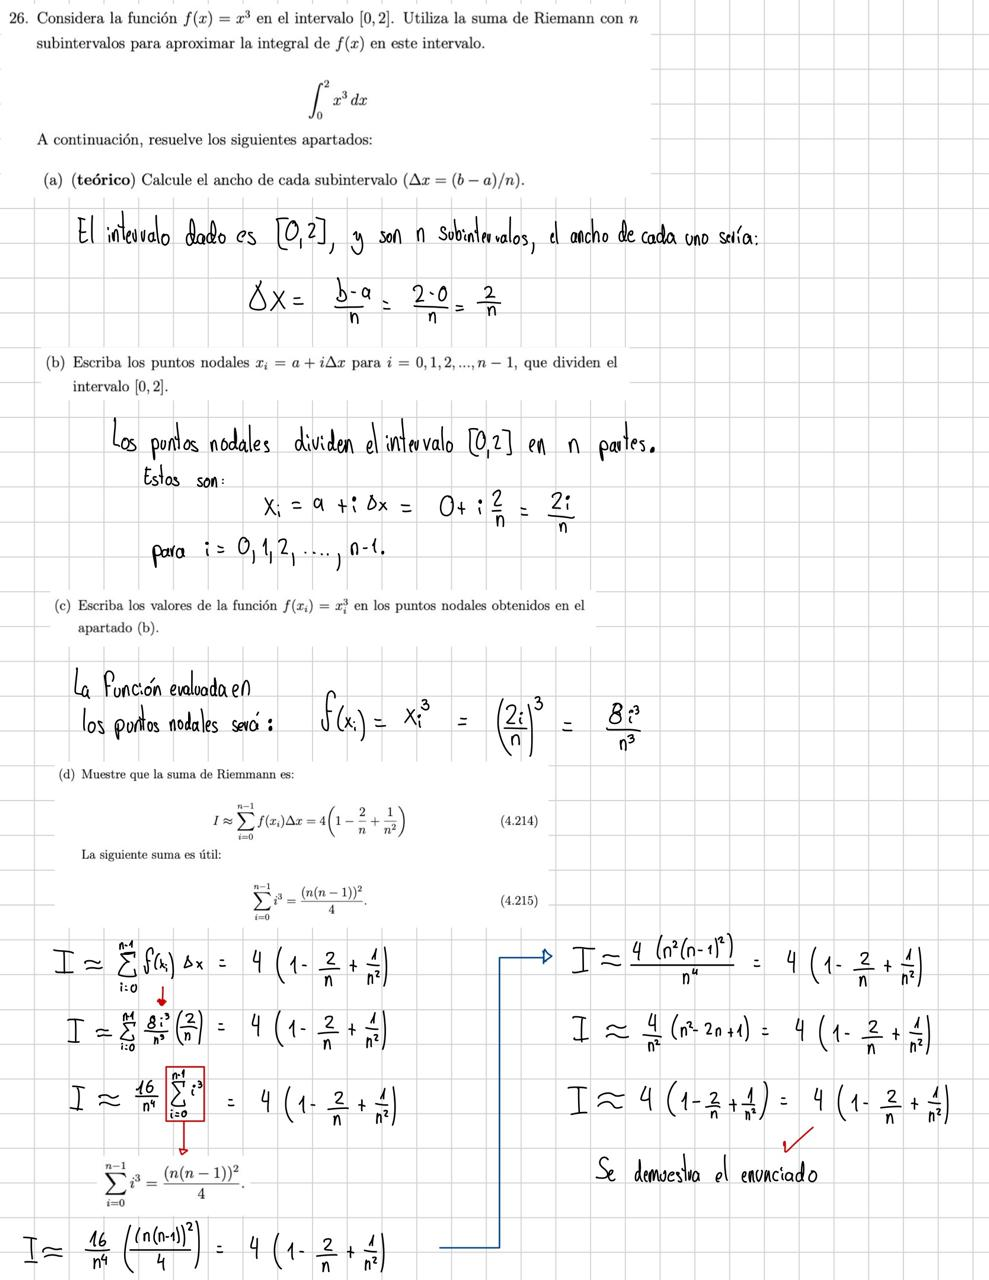

In [ ]:
#e.
n = 30
a, b = 0, 2
dx = (b - a) / n


x = np.linspace(a, b - dx, n)

f_x = x**3

I_estimado = np.sum(f_x * dx)

print(f'La integral aproximada para n = {n} es: {I_estimado}')


#f.


a, b = 0, 2
I_exacta = 4

n_values = np.linspace(30, 400, 100, endpoint=False)

errores = []

for n in n_values:
    dx = (b - a) / n
    x = np.linspace(a, b - dx, int(n))
    f_x = x**3
    I_estimado = np.sum(f_x * dx)
    error = abs(I_exacta - I_estimado)
    errores.append(error)

plt.plot(n_values, errores)
plt.xlabel('n')
plt.ylabel('Error |I_exacta - I_estimada|')
plt.title('Error de la estimación en función de n')
plt.show()



g. La suma de Riemann no es una buena estrategia para la aproximacion o estimacion de integrales, ya que la precisión de esta depende del numero de intervalos (n), siendo que se necesitaria un mayor numero de intervalos (n) para una mejor aproximacion. La cuadratura de Gauss, es mas eficiente que esta ya que la cuadratura usa nodos y pesos especificos para la aproximacion de integrales, teniendo una mayor precision con menos puntos de evaluacion.

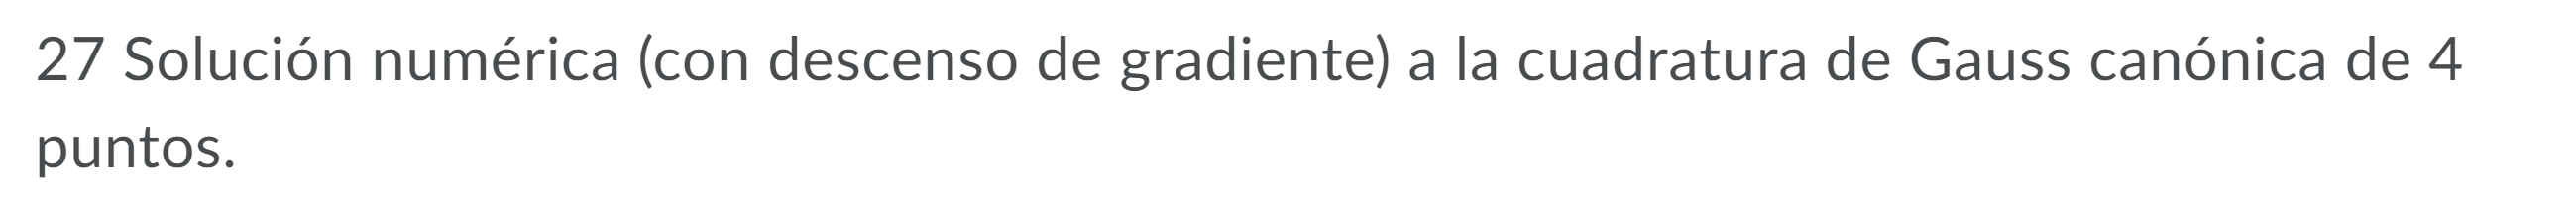

In [8]:
import numpy as np

# (a) Ecuaciones de la cuadratura de Gauss
def f_objetivo(variables):
    puntos = variables[:4]
    w = variables[4:]

    #Integral de x^0
    CG1 = w[0] + w[1] + w[2] + w[3] - 2
    #Integral de x^1
    CG2 = w[0]*puntos[0] + w[1]*puntos[1] + w[2]*puntos[2] + w[3]*puntos[3]
    #Integral de x^2
    CG3 = w[0]*puntos[0]**2 + w[1]*puntos[1]**2 + w[2]*puntos[2]**2 + w[3]*puntos[3]**2 - 2/3
    #Integral de x^3
    CG4 = w[0]*puntos[0]**3 + w[1]*puntos[1]**3 + w[2]*puntos[2]**3 + w[3]*puntos[3]**3
    #Integral de x^4
    CG5 = w[0]*puntos[0]**4 + w[1]*puntos[1]**4 + w[2]*puntos[2]**4 + w[3]*puntos[3]**4 - 2/5
    #Integral de x^5
    CG6 = w[0]*puntos[0]**5 + w[1]*puntos[1]**5 + w[2]*puntos[2]**5 + w[3]*puntos[3]**5
    #Integral de x^6
    CG7 = w[0]*puntos[0]**6 + w[1]*puntos[1]**6 + w[2]*puntos[2]**6 + w[3]*puntos[3]**6 - 2/7
    #Integral de x^7
    CG8 = w[0]*puntos[0]**7 + w[1]*puntos[1]**7 + w[2]*puntos[2]**7 + w[3]*puntos[3]**7

    return np.array([CG1, CG2, CG3, CG4, CG5, CG6, CG7, CG8])

#c  Jacobiano
def jacobiano(variables):
    jac = np.zeros((8, 8))
    h = 1e-8

    for i in range(8):
        variables_copy = variables.copy()
        variables_copy[i] += h
        f1 = f_objetivo(variables)
        f2 = f_objetivo(variables_copy)
        jac[:, i] = (f2 - f1) / h

    return jac

# (d) Descenso de gradiente
def descenso_gradiente(variables_iniciales, tasa_aprendizaje=0.01, max_iter=10000, tol=1e-6):
    variables = variables_iniciales.copy()
    for iter in range(max_iter):
        f = f_objetivo(variables)
        if np.linalg.norm(f) < tol:
            print(f"Convergencia alcanzada en la iteración {iter}")
            return variables

        # Jacobiano
        J = jacobiano(variables)
        # Con descenso de gradiente
        gradiente = np.linalg.inv(J).dot(f)
        variables -= tasa_aprendizaje * gradiente
        # Ajuste tasa de aprendizaje sugerida por GPT
        if np.linalg.norm(f) < 0.005:
            tasa_aprendizaje = 0.001

    print("Número de iteraciones alcanzado.")
    return variables

#e. Seed
np.random.seed(42)
variables_iniciales = np.random.uniform(-1., 1., size=8)

solucion = descenso_gradiente(variables_iniciales)

print("Solución  (puntos y w):")
print(solucion)

#f. Evaluar la integral
def integrar_cos(variables):
    puntos = variables[:4]
    w = variables[4:]
    resultado = sum(w[i] * np.cos(puntos[i]) for i in range(4))

    return resultado
resultado_integral = integrar_cos(solucion)

print(f"Resultado aproximado de la integral de cos(x) entre -1 y 1: {resultado_integral:.8f}")


Número de iteraciones alcanzado.
Solución  (puntos y w):
[ 0.33993631 -0.34002216  0.86112289 -0.86114592  0.65216551  0.65211895
  0.3478858   0.34782975]
Resultado aproximado de la integral de cos(x) entre -1 y 1: 1.68294178
